In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge

In [60]:
x, y = make_regression(n_samples=1000, n_features=1, noise=0.1)

In [61]:
lr = Ridge(alpha=1)

In [62]:
model = lr.fit(x, y)

In [63]:
y_pred = model.predict(x)

In [64]:
y_bar = np.mean(y)
x_bar = np.mean(x)

In [65]:
model.coef_

array([86.41113228])

In [ ]:
# M = np.sum((x - x_bar) * (y - y_bar)) / np.sum((x - x_bar) ** 2) + alpha

In [66]:
m = []
alpha = []
for _ in range(1, 100):
    m.append(np.sum((x - x_bar) * (y - y_bar)) / np.sum((x - x_bar) ** 2 + _))
    alpha.append(_)

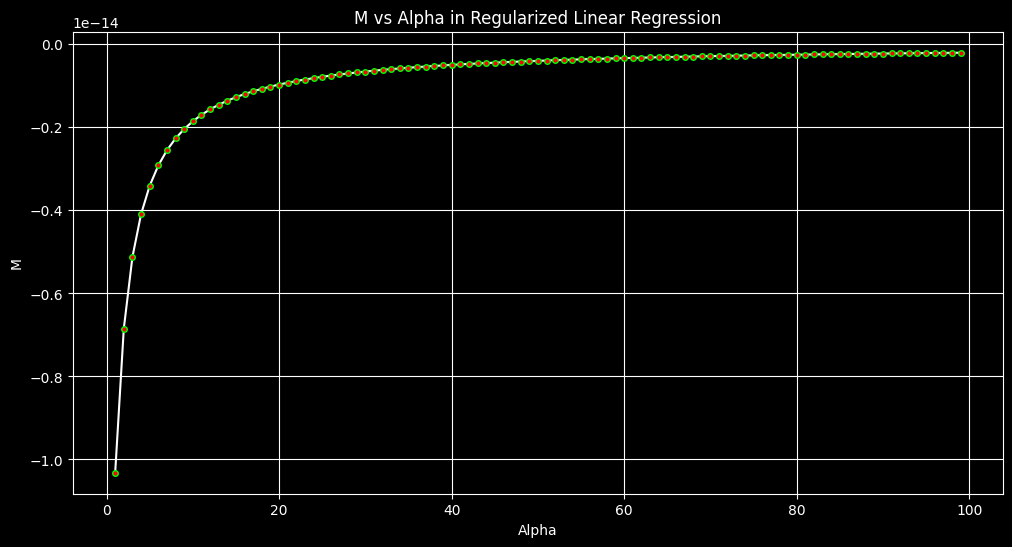

In [88]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")

plt.figure(figsize=(12.0, 6.0))
plt.plot(
    alpha,
    m,
    marker=".",
    linestyle="-",
    markerfacecolor="red",
    markeredgecolor="lime",
    markersize=8,
    color="white",
)

# Ensure annotation coordinates exist within the plotted data range
plt.annotate(
    text="As alpha increases, M decreases",
    xy=(10, -0.5),  # Point to annotate (adjust indices as needed)
    xytext=(50, -0.4),  # Text position
    arrowprops=dict(arrowstyle="->", color="yellow"),  # Optional arrow
    fontsize=12,
    color="yellow",
)

plt.grid(True)
plt.xlabel("Alpha")
plt.ylabel("M")
plt.title("M vs Alpha in Regularized Linear Regression")
plt.show()

In [98]:
# Effect of Alpha on Cost Function

CostFunction = []

In [103]:
model.coef_

array([86.41113228])

In [99]:
for _ in range(1, 100):
    CostFunction.append(np.sum(np.square(y - y_pred)) + alpha * model.coef_**2)

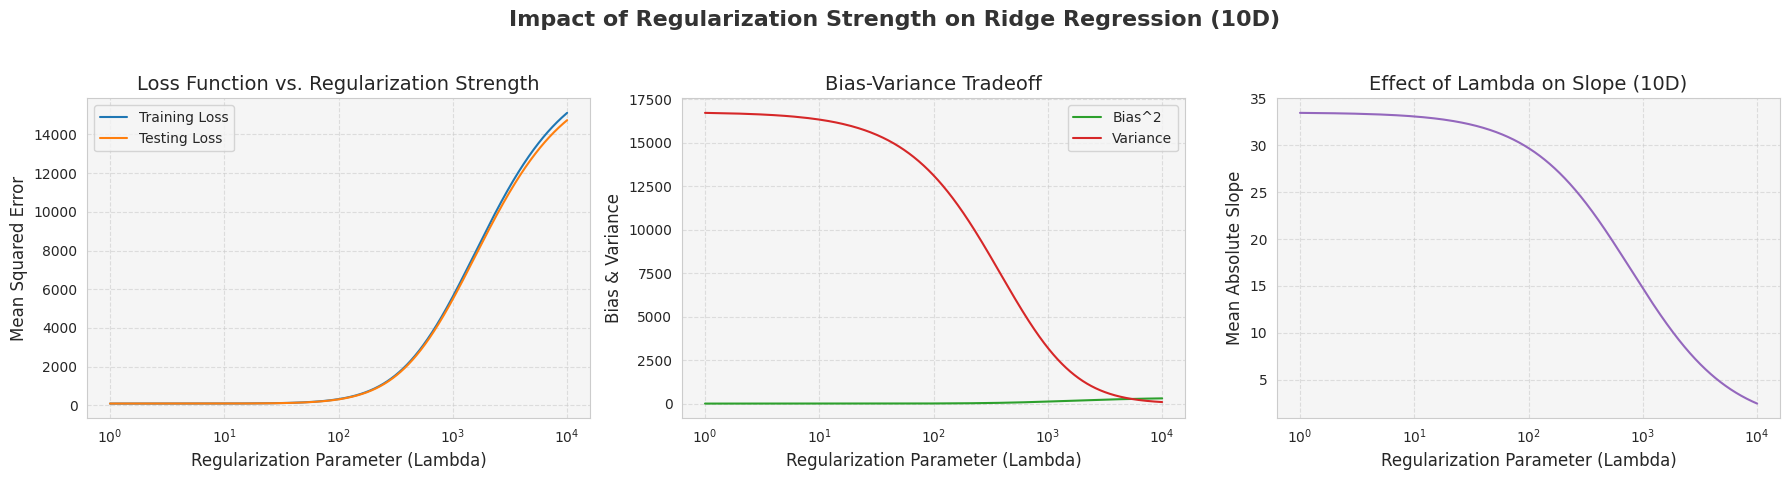

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Set Seaborn style for better visuals
sns.set_style("whitegrid")
plt.rcParams.update(
    {"axes.facecolor": "#f5f5f5", "grid.alpha": 0.6, "grid.linestyle": "--"}
)

# Generate synthetic 10-dimensional data using make_regression
X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)
y = y.reshape(-1, 1)  # Reshape to column vector

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define range of regularization parameters
lambdas = np.arange(1, 10000)
train_loss = []
test_loss = []
bias = []
variance = []
slope_values = []

# Compute loss, bias, variance, and slope for each lambda
for alpha in lambdas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    # Compute predictions
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)

    # Compute loss
    train_loss.append(mean_squared_error(y_train, y_train_pred))
    test_loss.append(mean_squared_error(y_test, y_test_pred))

    # Compute bias and variance
    bias.append((y_test - y_test_pred).mean() ** 2)
    variance.append(np.var(y_test_pred))

    # Store average slope (mean of absolute coefficients)
    slope_values.append(np.mean(np.abs(ridge.coef_)))

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle(
    "Impact of Regularization Strength on Ridge Regression (10D)",
    fontsize=16,
    fontweight="bold",
    color="#333333",
)

# Plot the loss function
axes[0].plot(
    lambdas,
    train_loss,
    label="Training Loss",
    linestyle="-",
    color="#1f77b4",
)
axes[0].plot(lambdas, test_loss, label="Testing Loss", linestyle="-", color="#ff7f0e")
axes[0].set_xscale("log")
axes[0].set_xlabel("Regularization Parameter (Lambda)", fontsize=12)
axes[0].set_ylabel("Mean Squared Error", fontsize=12)
axes[0].set_title("Loss Function vs. Regularization Strength", fontsize=14)
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.6)

# Plot bias-variance tradeoff
axes[1].plot(lambdas, bias, label="Bias^2", linestyle="-", color="#2ca02c")
axes[1].plot(lambdas, variance, label="Variance", linestyle="-", color="#d62728")
axes[1].set_xscale("log")
axes[1].set_xlabel("Regularization Parameter (Lambda)", fontsize=12)
axes[1].set_ylabel("Bias & Variance", fontsize=12)
axes[1].set_title("Bias-Variance Tradeoff", fontsize=14)
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.6)

# Plot effect of lambda on average slope
axes[2].plot(lambdas, slope_values, linestyle="-", color="#9467bd")
axes[2].set_xscale("log")
axes[2].set_xlabel("Regularization Parameter (Lambda)", fontsize=12)
axes[2].set_ylabel("Mean Absolute Slope", fontsize=12)
axes[2].set_title("Effect of Lambda on Slope (10D)", fontsize=14)
axes[2].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("ridge_regression_10d.png")
# plt.show()

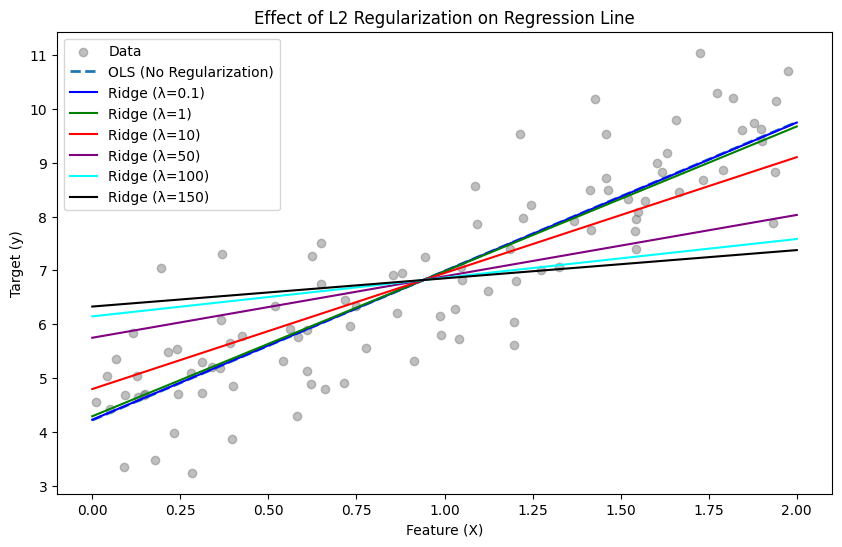

OLS Slope: 2.7701, Intercept: 4.2151
Ridge (λ=0.1) Slope: [2.76223165], Intercept: 4.2225
Ridge (λ=1) Slope: [2.69326395], Intercept: 4.2874
Ridge (λ=10) Slope: [2.15516098], Intercept: 4.7934
Ridge (λ=50) Slope: [1.1415159], Intercept: 5.7466
Ridge (λ=100) Slope: [0.71887618], Intercept: 6.1440
Ridge (λ=150) Slope: [0.5246336], Intercept: 6.3267


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Features
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with noise

# Fit Ordinary Least Squares (OLS) Regression
ols_model = LinearRegression()
ols_model.fit(X, y)

# Fit Ridge Regression with different lambda (alpha) values
lambdas = [0.1, 1, 10, 50, 100, 150]
ridge_models = [Ridge(alpha=l).fit(X, y) for l in lambdas]

# Plot data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data", color="gray", alpha=0.5)

# Plot OLS regression line
x_range = np.linspace(0, 2, 100).reshape(-1, 1)
ols_predictions = ols_model.predict(x_range)
plt.plot(
    x_range,
    ols_predictions,
    label="OLS (No Regularization)",
    linestyle="dashed",
    linewidth=2,
)

# Plot Ridge regression lines for different lambdas
colors = ["blue", "green", "red", "purple", "cyan", "black"]
for ridge_model, l, c in zip(ridge_models, lambdas, colors):
    ridge_predictions = ridge_model.predict(x_range)
    plt.plot(x_range, ridge_predictions, label=f"Ridge (λ={l})", color=c)

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Effect of L2 Regularization on Regression Line")
plt.legend()
plt.show()

# Print slope and intercept for OLS and Ridge models
print(
    f"OLS Slope: {ols_model.coef_[0][0]:.4f}, Intercept: {ols_model.intercept_[0]:.4f}"
)
for ridge_model, l in zip(ridge_models, lambdas):
    print(
        f"Ridge (λ={l}) Slope: {ridge_model.coef_}, Intercept: {ridge_model.intercept_[0]:.4f}"
    )

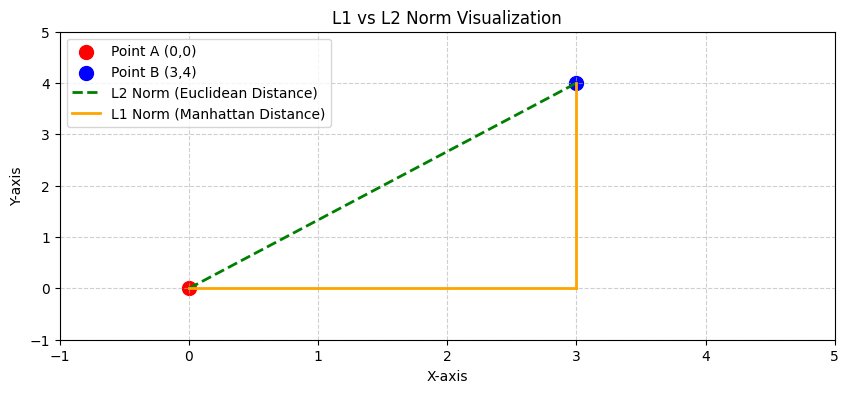

In [25]:
# Define points
A = np.array([0, 0])
B = np.array([3, 4])

# Create figure
fig, ax = plt.subplots(figsize=(10, 4))

# Plot points
ax.scatter(*A, color="red", label="Point A (0,0)", s=100)
ax.scatter(*B, color="blue", label="Point B (3,4)", s=100)

# L2 Norm (Euclidean Distance - Direct Line)
ax.plot(
    [A[0], B[0]], [A[1], B[1]], "g--", label="L2 Norm (Euclidean Distance)", linewidth=2
)

# L1 Norm (Manhattan Distance - Stepwise Path)
ax.plot(
    [A[0], B[0]], [A[1], A[1]], "orange", linestyle="-", linewidth=2
)  # Horizontal step
ax.plot(
    [B[0], B[0]],
    [A[1], B[1]],
    "orange",
    linestyle="-",
    linewidth=2,
    label="L1 Norm (Manhattan Distance)",
)  # Vertical step

# Labels and grid
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.set_xticks(np.arange(-1, 6, 1))
ax.set_yticks(np.arange(-1, 6, 1))
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.grid(True, linestyle="--", alpha=0.6)
ax.legend()
ax.set_title("L1 vs L2 Norm Visualization")

# Show plot
plt.show()

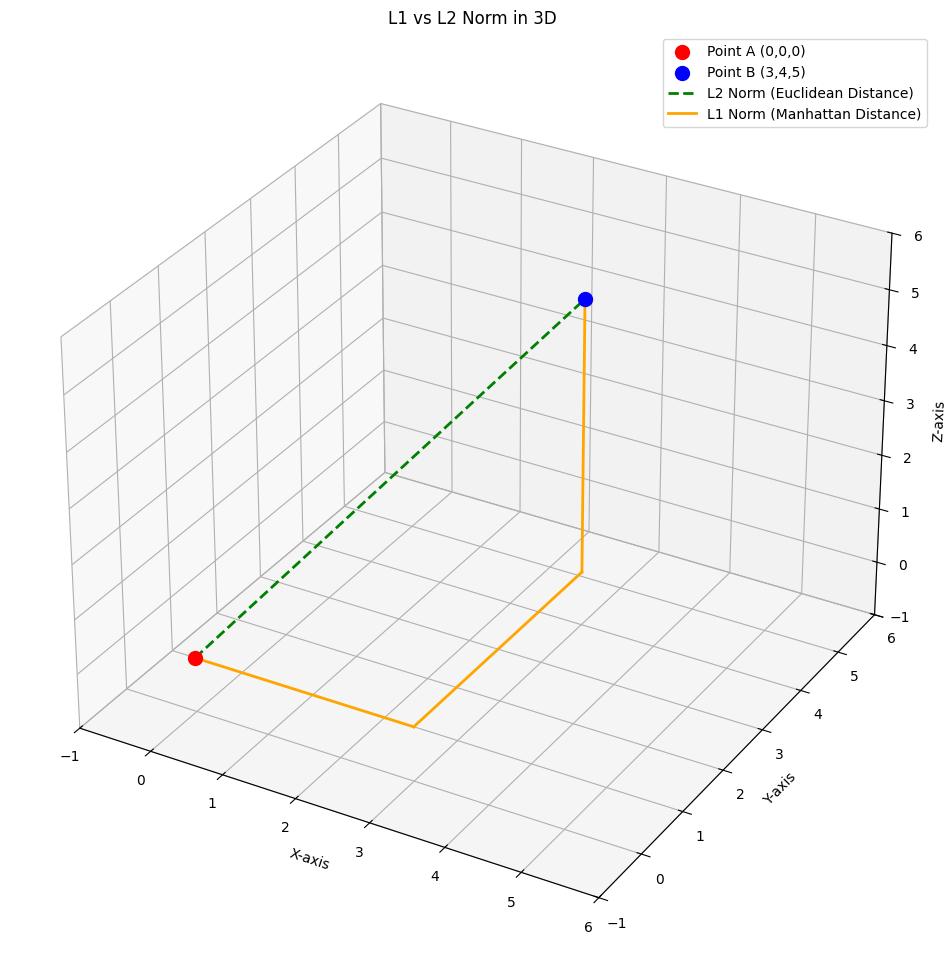

In [33]:
from mpl_toolkits.mplot3d import Axes3D

# Define points in 3D
A = np.array([0, 0, 0])
B = np.array([3, 4, 5])

# Create 3D figure
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection="3d")

# Plot points
ax.scatter(*A, color="red", label="Point A (0,0,0)", s=100)
ax.scatter(*B, color="blue", label="Point B (3,4,5)", s=100)

# L2 Norm (Euclidean Distance - Direct Line)
ax.plot(
    [A[0], B[0]],
    [A[1], B[1]],
    [A[2], B[2]],
    "g--",
    label="L2 Norm (Euclidean Distance)",
    linewidth=2,
)

# L1 Norm (Manhattan Distance - Stepwise Path)
ax.plot(
    [A[0], B[0]], [A[1], A[1]], [A[2], A[2]], "orange", linestyle="-", linewidth=2
)  # X movement
ax.plot(
    [B[0], B[0]], [A[1], B[1]], [A[2], A[2]], "orange", linestyle="-", linewidth=2
)  # Y movement
ax.plot(
    [B[0], B[0]],
    [B[1], B[1]],
    [A[2], B[2]],
    "orange",
    linestyle="-",
    linewidth=2,
    label="L1 Norm (Manhattan Distance)",
)  # Z movement

# Labels and grid
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 6)
ax.set_zlim(-1, 6)
ax.legend()
ax.set_title("L1 vs L2 Norm in 3D")

# Show plot
plt.show()